In [7]:
# Importing
import pandas as pd
import altair as alt
import numpy as np


from IPython.display import Markdown
from IPython.display import display

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.multioutput import MultiOutputClassifier


alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
# Load dataset/add columns befor and after1980
dwell_denver = pd.read_csv("dwellings_denver.csv")
dwell_ml = pd.read_csv("dwellings_ml.csv")
dwell_neighborhoods_ml = pd.read_csv("dwellings_neighborhoods_ml.csv")

new_dwell = dwell_ml.drop(columns=['yrbuilt', 'parcel'])

dwell_ml_features = new_dwell.drop(columns=['before1980']).columns

features  = dwell_ml_features.to_list()


dwell_ml['during1980'] = (dwell_ml['yrbuilt'] == 1980).astype(int)
dwell_ml['after1980'] = (dwell_ml['yrbuilt'] > 1980).astype(int)


features


['abstrprd',
 'livearea',
 'finbsmnt',
 'basement',
 'totunits',
 'stories',
 'nocars',
 'numbdrm',
 'numbaths',
 'sprice',
 'deduct',
 'netprice',
 'tasp',
 'smonth',
 'syear',
 'condition_AVG',
 'condition_Excel',
 'condition_Fair',
 'condition_Good',
 'condition_VGood',
 'quality_A',
 'quality_B',
 'quality_C',
 'quality_D',
 'quality_X',
 'gartype_Att',
 'gartype_Att/Det',
 'gartype_CP',
 'gartype_Det',
 'gartype_None',
 'gartype_att/CP',
 'gartype_det/CP',
 'arcstyle_BI-LEVEL',
 'arcstyle_CONVERSIONS',
 'arcstyle_END UNIT',
 'arcstyle_MIDDLE UNIT',
 'arcstyle_ONE AND HALF-STORY',
 'arcstyle_ONE-STORY',
 'arcstyle_SPLIT LEVEL',
 'arcstyle_THREE-STORY',
 'arcstyle_TRI-LEVEL',
 'arcstyle_TRI-LEVEL WITH BASEMENT',
 'arcstyle_TWO AND HALF-STORY',
 'arcstyle_TWO-STORY',
 'qualified_Q',
 'qualified_U',
 'status_I',
 'status_V']

In [9]:
setup = setup(new_dwell,target='before1980')



,Description,Value
0,Session id,1283
1,Target,before1980
2,Target type,Binary
3,Original data shape,"(22913, 49)"
4,Transformed data shape,"(22913, 49)"
5,Transformed train set shape,"(16039, 49)"
6,Transformed test set shape,"(6874, 49)"
7,Numeric features,48
8,Preprocess,True
9,Imputation type,simple


In [21]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:22:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9224,0.9758,0.9413,0.9350,0.9381,0.8340,0.8342,0.4120
rf,Random Forest Classifier,0.9222,0.9745,0.9440,0.9324,0.9381,0.8333,0.8335,0.2790
et,Extra Trees Classifier,0.9161,0.9702,0.9365,0.9298,0.9332,0.8207,0.8208,1.3330
gbc,Gradient Boosting Classifier,0.8988,0.9620,0.9289,0.9110,0.9198,0.7827,0.7830,1.9620
dt,Decision Tree Classifier,0.8959,0.8896,0.9150,0.9183,0.9166,0.7783,0.7783,0.2210
ada,Ada Boost Classifier,0.8760,0.9442,0.9090,0.8945,0.9016,0.7340,0.7345,0.7600
ridge,Ridge Classifier,0.8664,0.0000,0.9070,0.8825,0.8946,0.7123,0.7129,0.1490
lda,Linear Discriminant Analysis,0.8663,0.9315,0.9049,0.8840,0.8943,0.7126,0.7130,0.2870
qda,Quadratic Discriminant Analysis,0.7256,0.8963,0.6037,0.9413,0.7313,0.4767,0.5311,0.2220
lr,Logistic Regression,0.7111,0.7865,0.8770,0.7210,0.7914,0.3358,0.3535,0.7440


In [24]:
# print(best)
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9183,0.9732,0.9451,0.9257,0.9353,0.8246,0.8249
1,0.9327,0.9767,0.9521,0.9408,0.9464,0.8558,0.8559
2,0.9190,0.9754,0.9431,0.9283,0.9356,0.8262,0.8264
3,0.9377,0.9817,0.9511,0.9492,0.9501,0.8670,0.8670
4,0.9333,0.9779,0.9551,0.9392,0.9471,0.8569,0.8572
5,0.9108,0.9725,0.9411,0.9182,0.9295,0.8083,0.8087
6,0.9227,0.9741,0.9382,0.9382,0.9382,0.8350,0.8350
7,0.9096,0.9665,0.9412,0.9165,0.9287,0.8053,0.8059
8,0.9127,0.9712,0.9322,0.9285,0.9303,0.8135,0.8135


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

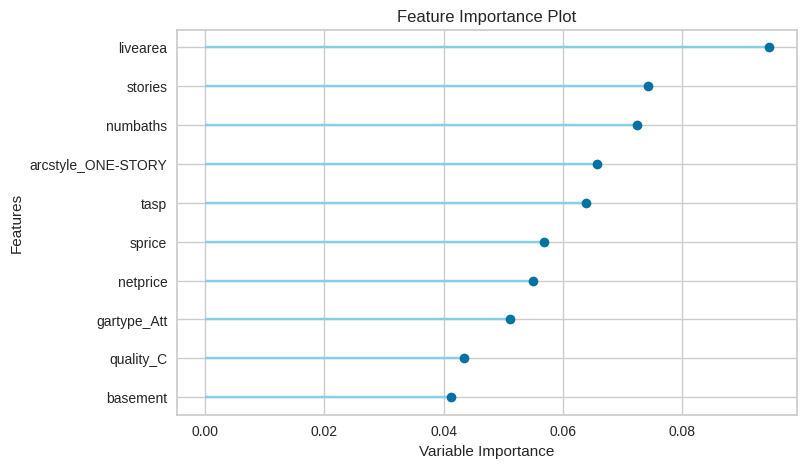

In [18]:
rf = create_model('rf')

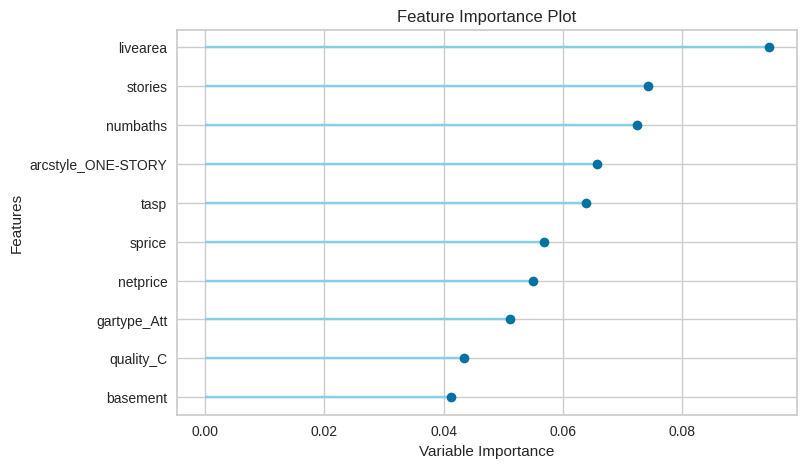

In [19]:
# Get the feature importance values in a DataFrame
# Plot the feature importance
plot_model(rf, plot='feature')

In [20]:
# Train model
X = dwell_ml[features]
y = dwell_ml[['before1980', 'during1980', 'after1980']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)


classifier = MultiOutputClassifier(RandomForestClassifier())


classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)


score = accuracy_score(y_test, predictions)

score



0.9144602851323829

In [ ]:
predictions

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])